In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from fft_ma import fft_ma_2d, fft_ma_3d

# 2D random field

## Use `fft_ma_2d` to generate randome field

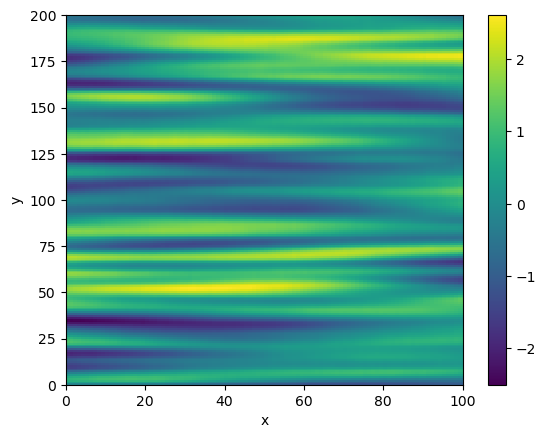

(100, 200)

In [2]:
random_field = fft_ma_2d(nx=100, ny=200, scale=[50,5], angle=0)
plt.figure()
plt.pcolor(random_field.T) # transpose
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()
random_field.shape

## Use `gstools` to generate random field

In [3]:
import gstools as gs

/home/sx450/miniconda3/lib/python3.9/site-packages/gstools/field/plot.py:367: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot: title={'center': 'Field 2D structured: (100, 200)'}, xlabel='$x$', ylabel='$y$'>

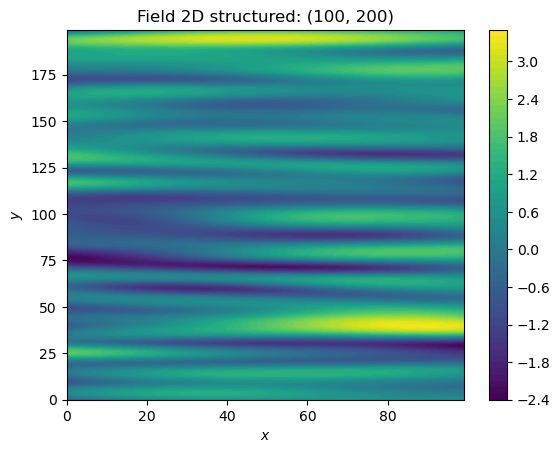

In [4]:
# structured field with a size 100x100 and a grid-size of 1x1
x = range(100)
y = range(200)
model = gs.Gaussian(dim=2, var=1, len_scale=[50,5])
srf = gs.SRF(model)
srf((x, y), mesh_type='structured')
srf.plot()

## Use `PyVista` for plotting

In [5]:
import pyvista as pv

### `UniformGrid` 

In [6]:
mesh = pv.UniformGrid(dimensions=(100,200,1))
mesh.point_data['values'] = random_field.T.flatten()
# mesh.point_data['values'] = random_field.flatten(order='F')
mesh.plot(cpos='xy')

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8b7cda37f0_0&reconnect=auto' style='widt…

In [7]:
mesh.points # points in the mesh

array([[  0.,   0.,   0.],
       [  1.,   0.,   0.],
       [  2.,   0.,   0.],
       ...,
       [ 97., 199.,   0.],
       [ 98., 199.,   0.],
       [ 99., 199.,   0.]])

### `StructuredGrid`

In [8]:
x = np.arange(100).astype(float)
y = np.arange(200).astype(float)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)

mesh = pv.StructuredGrid(X,Y,Z)
mesh.point_data['values'] = random_field.flatten()
# mesh.plot(show_edges=False, show_grid=False, cpos='xy')

pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=False)
# label_coords = mesh.points + [0, 0, 0.02]
# point_labels = [f'{i}' for i in range(mesh.n_points)]
# pl.add_point_labels(label_coords, point_labels, font_size=10, point_size=5)
pl.camera_position = 'xy'
pl.add_axes()
pl.show()

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8b9bdc0910_1&reconnect=auto' style='widt…

In [9]:
mesh.points # points in the mesh

pyvista_ndarray([[  0.,   0.,   0.],
                 [  0.,   1.,   0.],
                 [  0.,   2.,   0.],
                 ...,
                 [ 99., 197.,   0.],
                 [ 99., 198.,   0.],
                 [ 99., 199.,   0.]])

# 3D random field

## Use `fft_ma_3d` to generate random field

In [10]:
nx,ny,nz = 100,50,50
random_field = fft_ma_3d(nx=nx, ny=ny, nz=nz, scale=[20,2,2], angle=[0,0,0])

In [11]:
random_field.shape

(100, 50, 50)

## Use `PyVista` for plotting

### `UniformGrid` with `cell_data`

In [12]:
grid = pv.UniformGrid()

grid.dimensions = np.array(random_field.shape) + 1
# grid.origin = (0, 0, 0)  # The bottom left corner of the data set
# grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis
grid.cell_data["values"] = random_field.flatten(order="F")  # Flatten the array!
grid.plot()

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8bd7d77c70_2&reconnect=auto' style='widt…

### `UniformGrid` with `point_data`

In [13]:
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values on the
#   POINT data
grid.dimensions = random_field.shape

# Edit the spatial reference
grid.origin = (0, 0, 0)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis
grid.point_data["values"] = random_field.flatten(order="F")  # Flatten the array!
grid.plot()
# grid.contour().plot()  # contour plot

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8b7cda31f0_3&reconnect=auto' style='widt…

In [14]:
xrng = np.arange(100)
yrng = np.arange(50)
zrng = np.arange(50)
grid = pv.RectilinearGrid(xrng, yrng, zrng)
grid.point_data["values"] = random_field.flatten(order="F")
grid.plot()

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8bd7d77f10_4&reconnect=auto' style='widt…

### `StructuredGrid`

In [15]:
x = np.arange(100).astype(float)
y = np.arange(50).astype(float)
z = np.arange(50).astype(float)
X,Y,Z = np.meshgrid(x,y,z, indexing='ij') ### Use 'ij' indexing 

grid = pv.StructuredGrid(X,Y,Z)
grid.point_data['values'] = random_field.flatten(order='F') ### 
grid.plot(show_edges=False, show_grid=False)

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8bd7cbd700_5&reconnect=auto' style='widt…

In [16]:
grid.points # mesh points

pyvista_ndarray([[ 0.,  0.,  0.],
                 [ 1.,  0.,  0.],
                 [ 2.,  0.,  0.],
                 ...,
                 [97., 49., 49.],
                 [98., 49., 49.],
                 [99., 49., 49.]])

## Use `gstools` to generate random field

In [17]:
x = range(100)
y = z = range(50)
model = gs.Gaussian(dim=3, len_scale=[20, 2, 2], angles=(0, 0, 0))
srf = gs.SRF(model)
srf((x, y, z), mesh_type='structured')
# srf.vtk_export('3d_field') # Save to a VTK file for ParaView

mesh = srf.to_pyvista() # Create a PyVista mesh for plotting in Python
# mesh.contour(isosurfaces=8).plot()
mesh.plot()

Widget(value="<iframe src='http://localhost:42577/index.html?ui=P_0x7f8bd7caba90_6&reconnect=auto' style='widt…